In [1]:
import pandas as pd

In [2]:
# data/Teams.csvを読み込む  
team = pd.read_csv('data/Teams.csv')

In [3]:
# yearIDが2001以上のデータを抽出
team = team[team['yearID'] >= 2001]
# teamID, yearID,lgID, G, W, L, R, RA列を抽出
team = team[['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
# teamIDとyearIDで昇順にソート
team = team.sort_values(['teamID', 'yearID'])
# インデックスを振り直す
team = team.reset_index(drop=True)
print(team)

    teamID  yearID lgID    G   W    L    R   RA
0      ANA    2001   AL  162  75   87  691  730
1      ANA    2002   AL  162  99   63  851  644
2      ANA    2003   AL  162  77   85  736  743
3      ANA    2004   AL  162  92   70  836  734
4      ARI    2001   NL  162  92   70  818  677
..     ...     ...  ...  ...  ..  ...  ...  ...
715    WAS    2020   NL   60  26   34  293  301
716    WAS    2021   NL  162  65   97  724  820
717    WAS    2022   NL  162  55  107  603  855
718    WAS    2023   NL  162  71   91  700  845
719    WAS    2024   NL  162  71   91  660  764

[720 rows x 8 columns]


In [4]:
# 得点差分（R - RA）を計算して新しい列RDを追加
team['RD'] = team['R'] - team['RA']
# 勝率（W / (W + L)）を計算して新しい列W_PCTを追加
team['W_PCT'] = team['W'] / (team['W'] + team['L'])
print(team)

    teamID  yearID lgID    G   W    L    R   RA   RD     W_PCT
0      ANA    2001   AL  162  75   87  691  730  -39  0.462963
1      ANA    2002   AL  162  99   63  851  644  207  0.611111
2      ANA    2003   AL  162  77   85  736  743   -7  0.475309
3      ANA    2004   AL  162  92   70  836  734  102  0.567901
4      ARI    2001   NL  162  92   70  818  677  141  0.567901
..     ...     ...  ...  ...  ..  ...  ...  ...  ...       ...
715    WAS    2020   NL   60  26   34  293  301   -8  0.433333
716    WAS    2021   NL  162  65   97  724  820  -96  0.401235
717    WAS    2022   NL  162  55  107  603  855 -252  0.339506
718    WAS    2023   NL  162  71   91  700  845 -145  0.438272
719    WAS    2024   NL  162  71   91  660  764 -104  0.438272

[720 rows x 10 columns]


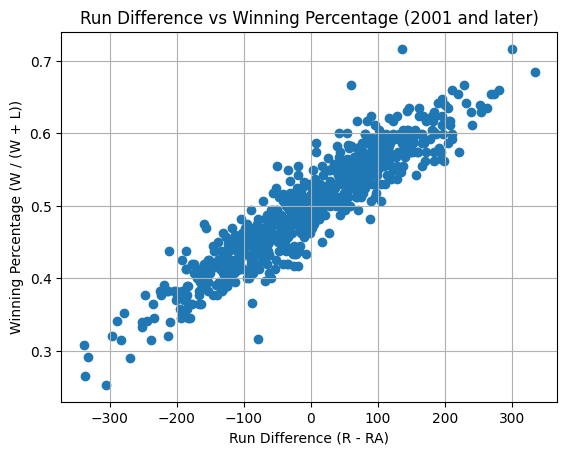

In [6]:
# 得点差分と勝率の散布図を描画
import matplotlib.pyplot as plt
plt.scatter(team['RD'], team['W_PCT'])
plt.xlabel('Run Difference (R - RA)')
plt.ylabel('Winning Percentage (W / (W + L))')
plt.title('Run Difference vs Winning Percentage (2001 and later)')
plt.grid(True)
plt.show()

Slope: 0.000618678111137378, Intercept: 0.49998768983278763


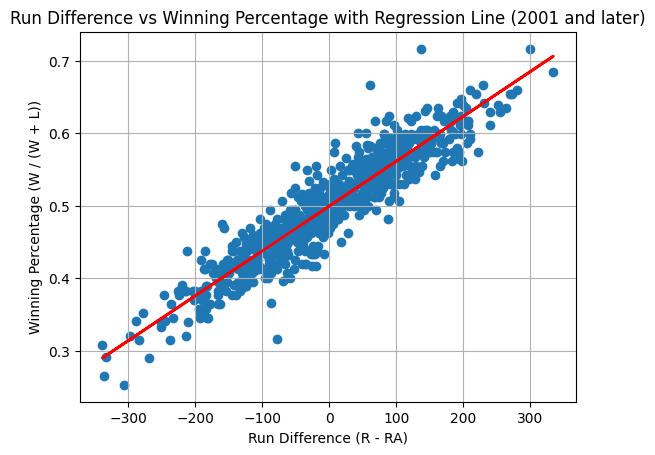

In [7]:
# 得点差分と勝率の適合直線を計算
import numpy as np
from sklearn.linear_model import LinearRegression
X = team['RD'].values.reshape(-1, 1)
y = team['W_PCT'].values
model = LinearRegression()
model.fit(X, y)
# 回帰直線の傾きと切片を取得
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope: {slope}, Intercept: {intercept}')
# 回帰直線を描画
plt.scatter(team['RD'], team['W_PCT'])
plt.plot(team['RD'], model.predict(X), color='red', linewidth=2)
plt.xlabel('Run Difference (R - RA)')
plt.ylabel('Winning Percentage (W / (W + L))')
plt.title('Run Difference vs Winning Percentage with Regression Line (2001 and later)')
plt.grid(True)
plt.show() 

In [8]:
# モデルの予測値と残差を計算
team['W_PCT_Pred'] = model.predict(X)
team['Residual'] = team['W_PCT'] - team['W_PCT_Pred']
print(team)

    teamID  yearID lgID    G   W    L    R   RA   RD     W_PCT  W_PCT_Pred  \
0      ANA    2001   AL  162  75   87  691  730  -39  0.462963    0.475859   
1      ANA    2002   AL  162  99   63  851  644  207  0.611111    0.628054   
2      ANA    2003   AL  162  77   85  736  743   -7  0.475309    0.495657   
3      ANA    2004   AL  162  92   70  836  734  102  0.567901    0.563093   
4      ARI    2001   NL  162  92   70  818  677  141  0.567901    0.587221   
..     ...     ...  ...  ...  ..  ...  ...  ...  ...       ...         ...   
715    WAS    2020   NL   60  26   34  293  301   -8  0.433333    0.495038   
716    WAS    2021   NL  162  65   97  724  820  -96  0.401235    0.440595   
717    WAS    2022   NL  162  55  107  603  855 -252  0.339506    0.344081   
718    WAS    2023   NL  162  71   91  700  845 -145  0.438272    0.410279   
719    WAS    2024   NL  162  71   91  660  764 -104  0.438272    0.435645   

     Residual  
0   -0.012896  
1   -0.016943  
2   -0.020348  

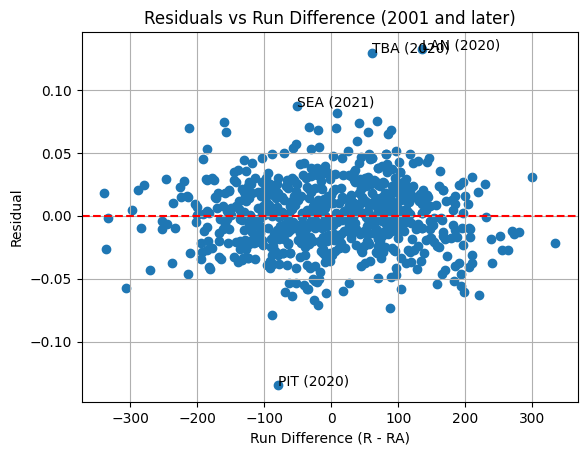

In [12]:
# 残差と得点差分の散布図を描画
# 残差が上位4つのチームグラフ内でに表示する
plt.scatter(team['RD'], team['Residual'])
import numpy as np
# 上位4つの残差（絶対値が大きい）を持つチームのインデックスを取得
top4_indices = np.argsort(np.abs(team['Residual']))[-4:]
for idx in top4_indices:
    label = f"{team['teamID'].iloc[idx]} ({team['yearID'].iloc[idx]})"
    plt.text(team['RD'].iloc[idx], team['Residual'].iloc[idx], label)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Run Difference (R - RA)')
plt.ylabel('Residual')
plt.title('Residuals vs Run Difference (2001 and later)')
plt.grid(True)
plt.show()